In [1]:
# let's set up our environment

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import the mnist dataset
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original', data_home='.')

Xtr = mnist['data']
Ytr = mnist['target']

In [3]:
# we are going to start easy

num_labels = 3

num_examples_per_label = 1000

num_pixels = 28*28

# innitialize a matrix to store our data
X = np.zeros((num_examples_per_label*num_labels, num_pixels))

for label in range(num_labels):
        num_pics_selected = 0
        pic_label = 0
        while num_pics_selected < num_examples_per_label:
            if Ytr[pic_label] == label:
                X[num_pics_selected + label*num_examples_per_label] = Xtr[pic_label]
                num_pics_selected +=1
            pic_label +=1
            
# print X.shape

# # Preprocess the CIFAR-10 data using this ...
# # Normalize the data: subtract the mean image
# mean_image = np.mean(X, axis = 0)
# X -= mean_image

# preprocessing the data so that it is only black and white
# have a look at np.place 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j] > 0.0:
            X[i,j] = 255.0
        
# # let's have a look at the processed data!
for pic in range(3):
    print pic
    plt.imshow(-1*X[pic].reshape(28,28), cmap = plt.get_cmap('gray'))
    plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-144f1f93c96a>, line 37)

In [4]:
# for picture in range(num_examples_per_label*num_labels):
#     plt.imshow(X[picture].reshape(28,28), cmap = 'Greys_r')
#     plt.show()

In [25]:
### HYPERPARAMETERS #######
# Here wil set up the parameters for our neural network
N = 1000 # number of points per class
D = 28*28 #Dimensionality of each datapoint
K = 3 # Number of classes
H = 25 # num of hidden units 
reg = 0.001
num_examples = N*K
learning_rate = 0.0001

##### GENERATE THE Y VECTOR ###
## Our data is ready:
# I have data in X, but I don't have y
one_array = np.ones(N, dtype='uint8')
y = np.hstack((one_array*0,one_array*1, one_array*2))

print X.shape
print y.shape

#### INITIALIZATION ######
# To train a neural network, the first step is to initialize the
# Weght matrices, which in this case will have shapes:
W1 = 0.01 * np.random.randn(D,H)
W2 = 0.01 * np.random.randn(H,K)
# We also need to initialize the bias vectors
b1 = np.zeros((1,H))
b2 = np.zeros((1,K))


for iteration in range(10000):
    # as sanity chec, print the shapes for W and X, and make sure you can do
    # operations with them.
    # print W.shape, X.shape, b.shape

    ##### FORWARD PASS [1st LAYER] ####
    # let's carry out the forward pass through the softmax activation
    hidden_input = np.dot(X,W1) + b1
    hidden_layer = np.maximum(0, hidden_input)
    
    ##### FORWARD PASS [2nd LAYER] ####
    scores = np.dot(hidden_layer, W2) + b2

    # we can pass our scores matrix through our activation function
    # in this case it will be softmax
    probs = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True)
    # print scores
    # print probs

    # compute the loss (this is also called the cross-entropy loss)
    correct_probs = probs[range(num_examples),y]
    # print range(num_examples)
    # print probs
    # print correct_probs
    correct_log_probs = -np.log(correct_probs)
    
    #### CALCULATE THE LOSS ####
    loss = np.sum(correct_log_probs)/num_examples + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W1*W1)
    if iteration % 1000 == 0:
        print 'the current loss, at iteration %d is: ' % iteration, loss 

    ## Backpropagate through the loss function
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores = dscores / num_examples

    # backpropagate to W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis = 0, keepdims = True)
    
    ## Backpropagate through the hidden layer
    dhidden = np.dot(dscores, W2.T)
    # Backprop through ReLU
    dhidden[hidden_layer < 0] = 0
    
    # backpropagate to W1 and b1
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis = 0, keepdims = True)
    
#     print 'shape of dW1 is: ', dW1.shape
    # add regularizations
    dW2 = dW2 + reg*W2
    dW1 = dW1 + reg*W1

    # This is where magic of gradient descent happens
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1


(3000, 784)
(3000,)
the current loss, at iteration 0 is:  2.05109242235
the current loss, at iteration 1000 is:  0.0557564624903


KeyboardInterrupt: 

In [26]:
# evaluate the performance of the current weight matrix:


##### FORWARD PASS [1st LAYER] ####
# let's carry out the forward pass through the softmax activation
hidden_input = np.dot(X,W1) + b1
hidden_layer = np.maximum(0, hidden_input)

##### FORWARD PASS [2nd LAYER] ####
scores = np.dot(hidden_layer, W2) + b2

# we can pass our scores matrix through our activation function
# in this case it will be softmax
probs = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True)
# print scores
# print probs

prediction = np.argmax(probs, axis = 1)
accuracy = np.mean(prediction == y)
print 'training accuracy is ', accuracy

training accuracy is  0.981666666667


(25, 3)


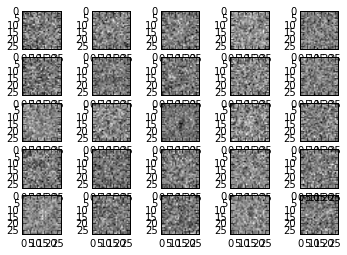

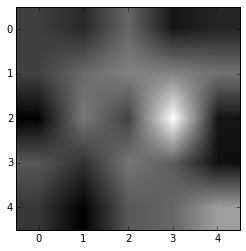

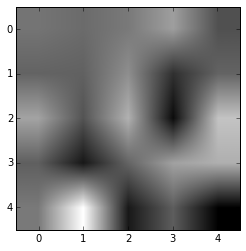

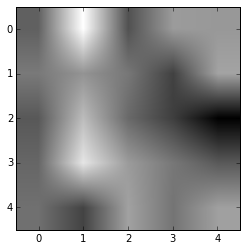

In [30]:
print W2.shape

# print (W2.dot(X[180]))

# subplots_adjust(hspace=0.000)
num_of_subplots=25

for i in range(num_of_subplots):
    ax1 = plt.subplot(num_of_subplots/5,num_of_subplots/5, i )
    plt.imshow(W1.T[i].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.show()



for i in range(3):
    plt.imshow(W2.T[i].reshape(5,5), cmap = plt.get_cmap('gray'))
    plt.show()